<a href="https://colab.research.google.com/github/dandersonlittle/testbinder/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/content/download-query-results-930346e9-51b2-49a6-a32a-6890a68af28a (1).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
df.head()

# Data cleaning and type conversion
df['TX_FROM'] = df['TX_FROM'].fillna('')  # Fill NaN values with an empty string
df['TX_TO'] = df['TX_TO'].fillna('')  # Fill NaN values with an empty string
df['TX_FROM'] = df['TX_FROM'].astype(str)  # Convert to string
df['TX_TO'] = df['TX_TO'].astype(str)  # Convert to string


FileNotFoundError: [Errno 2] No such file or directory: '/content/download-query-results-930346e9-51b2-49a6-a32a-6890a68af28a (1).csv'

In [ ]:
# Create an empty directed graph
G = nx.DiGraph()

# Iterate through the DataFrame rows and add nodes and edges
for index, row in df.iterrows():
    sender = row['TX_FROM']
    receiver = row['TX_TO']

    # Add nodes for sender and receiver if they don't exist yet
    G.add_node(sender)
    G.add_node(receiver)

    # Add an edge representing the transaction from sender to receiver
    G.add_edge(sender, receiver)


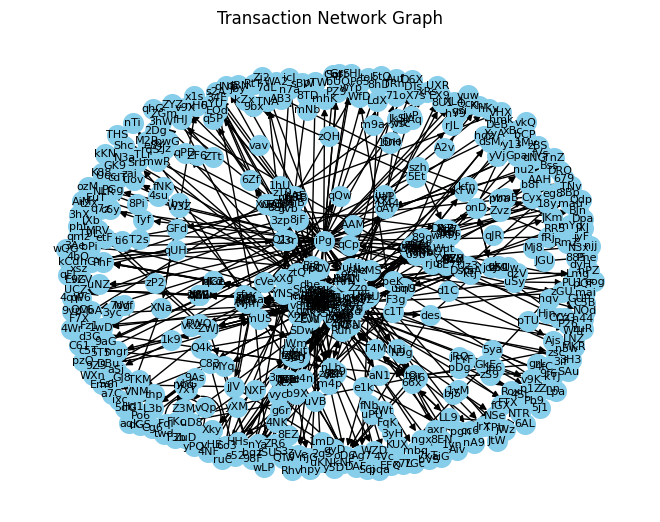

In [ ]:
# Create a dictionary to map full addresses to shortened labels
shortened_labels = {node: node[2:5] for node in G.nodes()}

# Rename the nodes in the graph using the shortened labels
G = nx.relabel_nodes(G, shortened_labels)

# Plot the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black')
plt.title('Transaction Network Graph')
plt.show()


In [ ]:
def detect_fraudulent_transactions(df, amount_threshold):
    fraudulent_transactions = []

    for index, row in df.iterrows():
        sender = row['TX_FROM']
        receiver = row['TX_TO']
        amount = row['AMOUNT']

        # Define your fraud detection criteria here
        if amount > amount_threshold:
            fraudulent_transactions.append((sender, receiver, amount))

    return fraudulent_transactions

# Set your desired amount threshold for fraud detection
amount_threshold = 10000000  # You can adjust this threshold as needed

# Call the function to detect fraudulent transactions
fraudulent_transactions = detect_fraudulent_transactions(df, amount_threshold)

# Print details of detected fraudulent transactions
if fraudulent_transactions:
    print("Potentially Fraudulent Transactions:")
    for sender, receiver, amount in fraudulent_transactions:
        print(f"Sender: {sender}, Receiver: {receiver}, Amount: {amount}")
else:
    print("No potentially fraudulent transactions detected.")


Potentially Fraudulent Transactions:
Sender: 6U91aKa8pmMxkJwBCfPTmUEfZi6dHe7DcFq2ALvB2tbB, Receiver: 5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1, Amount: 4463290936.72956
Sender: Bi5pUhMwJRJwq1MrWhNS9WJcXQGDv6fKm4FrpQvYhvTX, Receiver: 5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1, Amount: 604594766.007652
Sender: BpWJmXJZJMsG9S7Z7E3hqFvRpAJpejkvssHmMLhTM61A, Receiver: 6U91aKa8pmMxkJwBCfPTmUEfZi6dHe7DcFq2ALvB2tbB, Amount: 4463290936.72956
Sender: AxjdyLn3FPWUtGSaH7CPopyABv1XPQMifB3Kp37JNhmE, Receiver: FbonD3DrpzRweh2Z65EVjp5wJvVnFrv89RAvp3XvtWZE, Amount: 166300000.0
Sender: FbonD3DrpzRweh2Z65EVjp5wJvVnFrv89RAvp3XvtWZE, Receiver: AxjdyLn3FPWUtGSaH7CPopyABv1XPQMifB3Kp37JNhmE, Amount: 336000000.0
Sender: AxjdyLn3FPWUtGSaH7CPopyABv1XPQMifB3Kp37JNhmE, Receiver: FbonD3DrpzRweh2Z65EVjp5wJvVnFrv89RAvp3XvtWZE, Amount: 169700000.0
Sender: FbonD3DrpzRweh2Z65EVjp5wJvVnFrv89RAvp3XvtWZE, Receiver: 7rhxnLV8C77o6d8oz26AgK8x8m5ePsdeRawjqvojbjnQ, Amount: 1848100000.0
Sender: FbonD3DrpzRweh2Z65EVjp5wJvVnF

In [ ]:
def calculate_degree_centrality(G, top_n):
    # Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(G)

    # Sort nodes by degree centrality in descending order
    sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

    # Print the top N nodes with the highest degree centrality
    print(f"Top {top_n} Users with Highest Degree Centrality:")
    for i, (user, centrality) in enumerate(sorted_nodes[:top_n], start=1):
        print(f"{i}. User: {user}, Degree Centrality: {centrality:.4f}")

# Set the value of top_n for the number of top users to display
top_n = 10  # You can adjust this value as needed

# Call the function to calculate and print degree centrality
calculate_degree_centrality(G, top_n)

Top 10 Users with Highest Degree Centrality:
1. User: 544, Degree Centrality: 0.2491
2. User: iPg, Degree Centrality: 0.0941
3. User: hxn, Degree Centrality: 0.0697
4. User: 72n, Degree Centrality: 0.0575
5. User: FoS, Degree Centrality: 0.0523
6. User: 91a, Degree Centrality: 0.0418
7. User: nLb, Degree Centrality: 0.0383
8. User: Xut, Degree Centrality: 0.0366
9. User: jdy, Degree Centrality: 0.0296
10. User: WnB, Degree Centrality: 0.0296


In [ ]:
import networkx as nx

def calculate_degree_centrality_with_totals(G, top_n):
    # Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(G)

    # Sort nodes by degree centrality in descending order
    sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

    # Print the top N users with the highest degree centrality
    print(f"Top {top_n} Users with Highest Degree Centrality:")
    for i, (user, centrality) in enumerate(sorted_nodes[:top_n], start=1):
        total_sends = sum(1 for edge in G.edges(user))
        total_receives = sum(1 for edge in G.in_edges(user))
        print(f"{i}. User: {user}, Degree Centrality: {centrality:.4f}, Total Sends: {total_sends}, Total Receives: {total_receives}")

# Set the value of top_n for the number of top users to display
top_n = 10  # You can adjust this value as needed

# Call the function to calculate and print degree centrality with totals
calculate_degree_centrality_with_totals(G, top_n)


Top 10 Users with Highest Degree Centrality:
1. User: 544, Degree Centrality: 0.2491, Total Sends: 72, Total Receives: 71
2. User: iPg, Degree Centrality: 0.0941, Total Sends: 54, Total Receives: 0
3. User: hxn, Degree Centrality: 0.0697, Total Sends: 20, Total Receives: 20
4. User: 72n, Degree Centrality: 0.0575, Total Sends: 18, Total Receives: 15
5. User: FoS, Degree Centrality: 0.0523, Total Sends: 16, Total Receives: 14
6. User: 91a, Degree Centrality: 0.0418, Total Sends: 14, Total Receives: 10
7. User: nLb, Degree Centrality: 0.0383, Total Sends: 12, Total Receives: 10
8. User: Xut, Degree Centrality: 0.0366, Total Sends: 11, Total Receives: 10
9. User: jdy, Degree Centrality: 0.0296, Total Sends: 9, Total Receives: 8
10. User: WnB, Degree Centrality: 0.0296, Total Sends: 9, Total Receives: 8


In [ ]:
import pandas as pd

def detect_circular_transactions(df):
    circular_transactions = []

    # Group transactions by sender and receiver pairs
    grouped = df.groupby(['TX_FROM', 'TX_TO'])

    for (sender, receiver), group in grouped:
        # Check if there are multiple transactions between the same sender and receiver
        if len(group) > 1:
            circular_transactions.append((sender, receiver))

    return circular_transactions

# Call the function to detect circular transactions
circular_transactions = detect_circular_transactions(df)

# Print details of detected circular transactions
if circular_transactions:
    print("Detected Circular Transactions (Same Parties Sending and Receiving Back):")
    for sender, receiver in circular_transactions:
        print(f"Sender: {sender}, Receiver: {receiver}")
else:
    print("No circular transactions detected.")


Detected Circular Transactions (Same Parties Sending and Receiving Back):
Sender: 24zGAjrXuLmwadUVgMFtjwL27hywYMCzi2X2euoQYxtV, Receiver: 7rhxnLV8C77o6d8oz26AgK8x8m5ePsdeRawjqvojbjnQ
Sender: 2MFoS3MPtvyQ4Wh4M9pdfPjz6UhVoNbFbGJAskCPCj3h, Receiver: 5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1
Sender: 2N4fC9tfRGWxnUWhb4fzp7dTUY1yBSxXVJUEdVUmQUaJ, Receiver: 69grLw4PcSypZnn3xpsozCJFT8vs8WA5817VUVnzNGTh
Sender: 34N5sdNA9NrnwR2mdqj8MyT7S3CAK2itcwL6eeUrPhQB, Receiver: 7rhxnLV8C77o6d8oz26AgK8x8m5ePsdeRawjqvojbjnQ
Sender: 3CgvbiM3op4vjrrjH2zcrQUwsqh5veNVRjFCB9N6sRoD, Receiver: 5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1
Sender: 3LACH1LTqL8dRfcEmPsnkQ6518zRbFcGkDcsf6nDrZCN, Receiver: 7rhxnLV8C77o6d8oz26AgK8x8m5ePsdeRawjqvojbjnQ
Sender: 3LACH1LTqL8dRfcEmPsnkQ6518zRbFcGkDcsf6nDrZCN, Receiver: AxjdyLn3FPWUtGSaH7CPopyABv1XPQMifB3Kp37JNhmE
Sender: 3LoAYHuSd7Gh8d7RTFnhvYtiTiefdZ5ByamU42vkzd76, Receiver: 5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1
Sender: 3YD74MctB2RCNGaMUYQRGrTdPUFh6ZMHjWau5f6Br8mR, 

In [ ]:
import pandas as pd

def detect_and_list_circular_transactions(df):
    circular_transactions = {}

    # Group transactions by sender and receiver pairs
    grouped = df.groupby(['TX_FROM', 'TX_TO'])

    for (sender, receiver), group in grouped:
        # Check if there are multiple transactions between the same sender and receiver
        if len(group) > 1:
            circular_transactions[(sender, receiver)] = group[['TX_ID', 'AMOUNT']]

    return circular_transactions

# Call the function to detect and list circular transactions
circular_transactions = detect_and_list_circular_transactions(df)

# Print details of detected circular transactions along with their transactions
if circular_transactions:
    print("Detected Circular Transactions (Same Parties Sending and Receiving Back):")
    for (sender, receiver), transactions in circular_transactions.items():
        print(f"Sender: {sender}, Receiver: {receiver}")
        print(transactions.to_string(index=False))  # Print the transactions for this pair
        print("-" * 50)  # Separator between circular transactions
else:
    print("No circular transactions detected.")


Detected Circular Transactions (Same Parties Sending and Receiving Back):
Sender: 24zGAjrXuLmwadUVgMFtjwL27hywYMCzi2X2euoQYxtV, Receiver: 7rhxnLV8C77o6d8oz26AgK8x8m5ePsdeRawjqvojbjnQ
                                                                                   TX_ID       AMOUNT
3zWVppbyCejgsybL7K5ZjaTEPmocE5yjzvTu92bMCYYvs5AEskD6D5ZgVR4nUY5a2m8QBsWoBgwtC2R1zmy2ZgqN 35208.418945
36a1tvMm7Txtzg4dPuXUFrRacdEnuWCcc24RoPabnh64VxRJtGXxn8FjVxWCDSsjUsTAz16JUAUaqyrtfmkqonaf 35914.012953
--------------------------------------------------
Sender: 2MFoS3MPtvyQ4Wh4M9pdfPjz6UhVoNbFbGJAskCPCj3h, Receiver: 5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1
                                                                                  TX_ID   AMOUNT
QXUecqUKzk4vE6swdAo8n1kSmBz2nQXt4Ms9Q6u96oo8xjXhhayekbZc4fe1Nsfs5gDzk9ZopA5qoWZsDFyUrjp 0.050378
dJLmDLTZaoQEbWB4PHCyLwb1UWfhb2f93Pjc88BN8xnW3n2pwtav6imnggFvgxM4pAkpYnvkFtAiYWZEdcvJMuJ 0.012000
--------------------------------------------------
Sender: 2